### **Introduction**

Bước đầu trong quá trình phân tích và đánh giá dữ liệu đó là phần *tiền xử lý dữ liệu*. Tiền xử lý dữ liệu cực kì quan trọng trong việc xây dựng hướng đi cũng như các kết quả khám phá dữ liệu sau này. Sau đây là các thông tin cơ bản về tập dữ liệu được sử dụng trong dự án này. 

1. **Thông tin người dùng**

`user_id` - Mã định danh duy nhất cho mỗi người dùng.

`age` - Độ tuổi của người dùng.

`Gender` - Giới tính của người dùng (ví dụ: Nam, Nữ, Khác).

`Date_Registered` - Ngày người dùng đăng ký.

2. **Thông tin chương trình khách hàng thân thiết**

`Is_current_loyalty_program_member`- Người dùng hiện có phải là thành viên của chương trình khách hàng thân thiết hay không (Có/Không).

`loyalty_points_redeemed`- Số điểm thưởng mà người dùng đổi được.

`loyalty_tier`- Mức độ trung thành của người dùng.

`Received_tier_discount_percentage`- Phần trăm chiết khấu mà người dùng nhận được dựa trên cấp độ trung thành của họ.

`Received_card_discount_percentage`- Phần trăm chiết khấu mà người dùng nhận được khi sử dụng thẻ thành viên.

`Received_coupon_discount_percentage`- Phần trăm chiết khấu mà người dùng nhận được khi sử dụng phiếu giảm giá.

3. **Thông tin sản phẩm**

`product_category`- Loại sản phẩm đã mua (ví dụ: đồ điện tử, đồ dùng văn phòng).

`Product_value`- Giá hiển thị của sản phẩm.

4. **Chi tiết giao dịch**

`transaction_id`- Một mã định danh duy nhất cho mỗi giao dịch.

`order_id`- Mã định danh duy nhất cho đơn hàng mà giao dịch là một phần trong đó.

`payment_method`- Phương thức thanh toán được sử dụng cho giao dịch.

`payment_datetime`- Ngày và giờ thực hiện thanh toán.

`purchased_datetime`- Ngày và giờ mua sản phẩm.

`purchase_medium`- Phương tiện được sử dụng để mua hàng.

`final_payment`- Số tiền cuối cùng người dùng phải trả (sau khi đã giảm giá và chi phí vận chuyển).

5. **Thông tin giao hàng**

`released_date` - Ngày sản phẩm được xuất xưởng để vận chuyển.

`estimated_delivery_date` - Ngày giao hàng dự kiến ​​của sản phẩm.

`received_date` - Ngày thực tế khách hàng nhận được sản phẩm.

`shipping_method` - Phương thức vận chuyển được sử dụng (ví dụ: Tiêu chuẩn, Nhanh).

`tracking_number` - Mã số theo dõi được gán cho lô hàng.

6. **Biến mục tiêu**

`customer_experience`- Biến mục tiêu, biểu diễn trải nghiệm của khách hàng với giao dịch. Biến này có thể có các giá trị sau:

>  `good`

>  `neutral`

>  `bad`


### **1. Imports** 

- Import libraries

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


- Load data train 

In [44]:
train_set = pd.read_csv('./train_dataset.csv')

### **2. Data Preprocessing** 

####  2.1 Xử lý các dữ liệu thiếu và trùng lặp

In [45]:
train_set.head()

,id,user_id,age,Gender,Date_Registered,Is_current_loyalty_program_member,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,...,payment_datetime,purchased_datetime,purchase_medium,final_payment,released_date,estimated_delivery_date,received_date,shipping_method,tracking_number,customer_experience
0,0,****589084,44,O,2020-01-01,NO,5,NaN,NaN,3.0,...,2020-01-05 22:27:16,2020-01-05 22:27:16,online,1293.00,2020-01-12,2020-01-17,2020-01-17,standard,***9AWDD64SYI,neutral
1,1,****494191,36,O,2020-01-04,YES,4,1.0,3.0,4.0,...,2020-01-06 00:37:51,2020-01-06 00:37:51,in-store,4522.44,2020-01-07,2020-01-12,2020-01-09,express,***3SSRORRZ0X,bad
2,2,****216469,40,F,2020-01-02,NO,3,NaN,NaN,3.0,...,2020-01-07 03:02:35,2020-01-07 03:02:35,online,5628.00,2020-01-12,2020-01-18,2020-01-18,express,***2VSB7MH7FN,good
3,3,****707170,33,M,2020-01-06,YES,1,1.0,3.0,2.0,...,2020-01-09 22:05:39,2020-01-09 22:05:39,in-store,2073.32,2020-01-13,2020-01-15,2020-01-17,express,***9XENHE2PKZ,bad
4,4,****066329,43,O,2020-01-06,YES,1,1.0,3.0,4.0,...,2020-01-11 08:32:22,2020-01-11 08:32:22,online,310.86,2020-01-15,2020-01-22,2020-01-20,express,***QTWLMEL0PE,bad


- Lọc bỏ các cột không cần thiết

In [46]:
train_set = train_set.drop(['id','transaction_id', 'order_id',  'tracking_number'], axis=1)

In [47]:
train_set['user_id'] = train_set['user_id'].str.replace('****', '', regex=False) 

- Điền giá trị trống

In [48]:
train_set['loyalty_tier'] = train_set['loyalty_tier'].fillna(0)
train_set['Received_tier_discount_percentage'] = train_set['Received_tier_discount_percentage'].fillna(0)
train_set['Received_card_discount_percentage'] = train_set['Received_card_discount_percentage'].fillna(0)


- Nhãn dữ liệu từ các cột

In [49]:
columns = [
 'Gender',
 'Is_current_loyalty_program_member',
 'loyalty_points_redeemed',
 'loyalty_tier',
 'payment_method', 'purchase_medium',
 'shipping_method',
 'customer_experience']

In [50]:
for item in columns:
    print(f"Nhãn dữ liệu từ {item}:", train_set[item].unique())

Nhãn dữ liệu từ Gender: ['O' 'F' 'M']
Nhãn dữ liệu từ Is_current_loyalty_program_member: ['NO' 'YES']
Nhãn dữ liệu từ loyalty_points_redeemed: [5 4 3 1 0 2]
Nhãn dữ liệu từ loyalty_tier: [0. 1. 2. 4. 3.]
Nhãn dữ liệu từ payment_method: ['visa_c' 'amex' 'mastercard_c' 'coinsph' 'visa_d' 'gcash' 'maya' 'cash'
 'bank_transfer' 'shopeepay' 'otc' 'grabpay' 'mastercard_d']
Nhãn dữ liệu từ purchase_medium: ['online' 'in-store']
Nhãn dữ liệu từ shipping_method: ['standard' 'express']
Nhãn dữ liệu từ customer_experience: ['neutral' 'bad' 'good']


- Danh sách dữ liệu trùng lặp

In [51]:
user_id = train_set['user_id']
train_set = train_set.drop(['user_id'], axis=1)


In [52]:
train_set.head()

,age,Gender,Date_Registered,Is_current_loyalty_program_member,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,product_category,...,payment_method,payment_datetime,purchased_datetime,purchase_medium,final_payment,released_date,estimated_delivery_date,received_date,shipping_method,customer_experience
0,44,O,2020-01-01,NO,5,0.0,0.0,3.0,3,office supplies,...,visa_c,2020-01-05 22:27:16,2020-01-05 22:27:16,online,1293.00,2020-01-12,2020-01-17,2020-01-17,standard,neutral
1,36,O,2020-01-04,YES,4,1.0,3.0,4.0,1,electronics,...,amex,2020-01-06 00:37:51,2020-01-06 00:37:51,in-store,4522.44,2020-01-07,2020-01-12,2020-01-09,express,bad
2,40,F,2020-01-02,NO,3,0.0,0.0,3.0,5,pet supplies,...,mastercard_c,2020-01-07 03:02:35,2020-01-07 03:02:35,online,5628.00,2020-01-12,2020-01-18,2020-01-18,express,good
3,33,M,2020-01-06,YES,1,1.0,3.0,2.0,3,clothing,...,visa_c,2020-01-09 22:05:39,2020-01-09 22:05:39,in-store,2073.32,2020-01-13,2020-01-15,2020-01-17,express,bad
4,43,O,2020-01-06,YES,1,1.0,3.0,4.0,2,books,...,visa_c,2020-01-11 08:32:22,2020-01-11 08:32:22,online,310.86,2020-01-15,2020-01-22,2020-01-20,express,bad


In [53]:
train_set[train_set.duplicated()]

,age,Gender,Date_Registered,Is_current_loyalty_program_member,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,product_category,...,payment_method,payment_datetime,purchased_datetime,purchase_medium,final_payment,released_date,estimated_delivery_date,received_date,shipping_method,customer_experience
14559,42,F,2020-05-13,NO,5,0.0,0.0,5.0,2,pet supplies,...,visa_c,2021-10-06 08:32:51,2021-10-06 08:32:51,online,4820.00,2021-10-12,2021-10-19,2021-10-16,standard,good
20151,27,M,2022-01-08,NO,0,0.0,0.0,0.0,1,music,...,cash,2022-01-16 02:22:24,2022-01-16 02:22:24,online,5914.00,2022-01-20,2022-01-23,2022-01-20,express,bad
28656,18,F,2021-01-25,YES,4,3.0,7.0,0.0,4,pet supplies,...,shopeepay,2022-05-23 09:42:22,2022-05-23 09:42:22,online,5914.00,2022-05-26,2022-05-30,2022-05-27,express,bad
53426,39,O,2020-09-24,YES,3,2.0,5.0,0.0,3,clothing,...,visa_d,2023-02-18 05:18:00,2023-02-18 05:18:00,online,3235.00,2023-02-23,2023-02-25,2023-02-26,express,good
80225,53,O,2023-02-24,YES,1,1.0,3.0,1.0,1,health,...,mastercard_c,2023-09-11 15:10:35,2023-09-11 15:10:35,online,5073.85,2023-09-18,2023-09-23,2023-09-20,standard,bad
93722,29,M,2023-07-01,YES,1,1.0,3.0,0.0,4,clothing,...,mastercard_d,2023-12-03 03:04:26,2023-12-03 03:04:26,online,2196.00,2023-12-08,2023-12-14,2023-12-13,express,neutral
104620,19,M,2023-04-18,NO,2,0.0,0.0,2.0,2,clothing,...,amex,2024-01-30 23:08:26,2024-01-30 23:08:26,in-store,6184.00,2024-02-02,2024-02-05,2024-02-03,express,good
120427,26,M,2024-02-03,NO,1,0.0,0.0,0.0,0,toys,...,gcash,2024-04-15 11:27:51,2024-04-15 11:27:51,online,2110.00,2024-04-20,2024-04-21,2024-04-18,standard,good
126418,50,O,2022-09-26,YES,0,3.0,7.0,1.0,0,office supplies,...,amex,2024-05-11 09:47:44,2024-05-11 09:47:44,in-store,4671.88,2024-05-16,2024-05-22,2024-05-20,express,good
170816,18,F,2024-01-20,YES,3,3.0,7.0,0.0,1,groceries,...,shopeepay,2024-10-13 18:32:52,2024-10-13 18:32:52,in-store,2584.00,2024-10-20,2024-10-27,2024-10-27,express,good


- Loại bỏ trùng lặp

In [54]:
train_set.drop_duplicates(inplace=True)

In [55]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206957 entries, 0 to 206968
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   age                                  206957 non-null  int64  
 1   Gender                               206957 non-null  object 
 2   Date_Registered                      206957 non-null  object 
 3   Is_current_loyalty_program_member    206957 non-null  object 
 4   loyalty_points_redeemed              206957 non-null  int64  
 5   loyalty_tier                         206957 non-null  float64
 6   Received_tier_discount_percentage    206957 non-null  float64
 7   Received_card_discount_percentage    206957 non-null  float64
 8   Received_coupon_discount_percentage  206957 non-null  int64  
 9   product_category                     206957 non-null  object 
 10  Product_value                        206957 non-null  int64  
 11  payment_method    

####  2.2 Chuẩn hóa dữ liệu

In [57]:
train_set['Gender'] = train_set['Gender'].replace({
    'O': 'Other',
    'F': 'Female',
    'M': 'Male'
})


In [58]:
train_set['payment_method'] = train_set['payment_method'].replace({
    'amex': 'American Expres',
    'visa_c': 'Credit Card',
    'mastercard_c':'Credit Card',
    'visa_d': 'Debit Card',
    'mastercard_d': 'Debit Card',
    'gcash':'G-cash',
    'maya':'Maya',
    'coinsph':'Coin-Sph',
    'grabpay':'Grab-Pay',
    'shopeepay':'Shopee-Pay'
})

In [59]:
for item in columns:
    print(f"Nhãn dữ liệu từ {item}:", train_set[item].unique())

Nhãn dữ liệu từ Gender: ['Other' 'Female' 'Male']
Nhãn dữ liệu từ Is_current_loyalty_program_member: ['NO' 'YES']
Nhãn dữ liệu từ loyalty_points_redeemed: [5 4 3 1 0 2]
Nhãn dữ liệu từ loyalty_tier: [0. 1. 2. 4. 3.]
Nhãn dữ liệu từ payment_method: ['Credit Card' 'American Expres' 'Coin-Sph' 'Debit Card' 'G-cash' 'Maya'
 'cash' 'bank_transfer' 'Shopee-Pay' 'otc' 'Grab-Pay']
Nhãn dữ liệu từ purchase_medium: ['online' 'in-store']
Nhãn dữ liệu từ shipping_method: ['standard' 'express']
Nhãn dữ liệu từ customer_experience: ['neutral' 'bad' 'good']


####  2.3 Loại bỏ dữ liệu ngoại lai

In [60]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206957 entries, 0 to 206968
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   age                                  206957 non-null  int64  
 1   Gender                               206957 non-null  object 
 2   Date_Registered                      206957 non-null  object 
 3   Is_current_loyalty_program_member    206957 non-null  object 
 4   loyalty_points_redeemed              206957 non-null  int64  
 5   loyalty_tier                         206957 non-null  float64
 6   Received_tier_discount_percentage    206957 non-null  float64
 7   Received_card_discount_percentage    206957 non-null  float64
 8   Received_coupon_discount_percentage  206957 non-null  int64  
 9   product_category                     206957 non-null  object 
 10  Product_value                        206957 non-null  int64  
 11  payment_method    

- Interquartile Range

In [73]:
def Interquartile_Range(data,Quartile):
    Q1 = data[Quartile].quantile(0.25)
    Q3 = data[Quartile].quantile(0.75)
    Iqr = Q3 - Q1
    data_clean = data[(data[Quartile] >= Q1 - 1.5 * Iqr) & (data[Quartile] <= Q3 + 1.5 * Iqr)]
    return data_clean

In [74]:
train_set = Interquartile_Range(train_set, Quartile='Product_value')
train_set = Interquartile_Range(train_set, Quartile='final_payment')


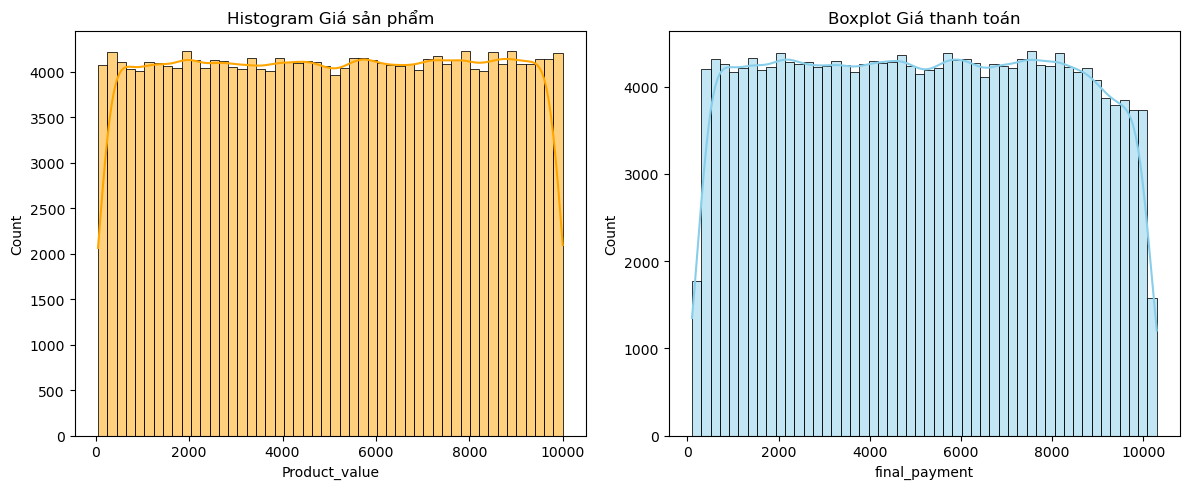

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(train_set['Product_value'], bins=50, kde=True, ax=axes[0], color='orange')
axes[0].set_title('Histogram Giá sản phẩm')
sns.histplot(train_set['final_payment'], bins=50, kde=True, ax=axes[1], color='skyblue')
axes[1].set_title('Boxplot Giá thanh toán')
plt.tight_layout()
plt.show()